# Figures from: Global Oscillation of Shell H-ingestion as revealed by 3D Hydrodynamic Simulations of Turbulent He-shell flash convection in a Low-Metallicity AGB Star

In [1]:
import sys
sys.path.insert(0, '/user/jericho/PyPPM')
from ppmpy.ppm import *
%matplotlib nbagg
import numpy as np
import nugridpy.mesa as ms
import nugridpy.utils as utils
sys.path.insert(0,'/data/ppm_rpod2/lib/lcse/')
import rprofile as rprofile

cb = utils.colourblind

## Fig. 1

In [3]:
hd = ms.history_data('/data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS/')

Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


<IPython.core.display.Javascript object>


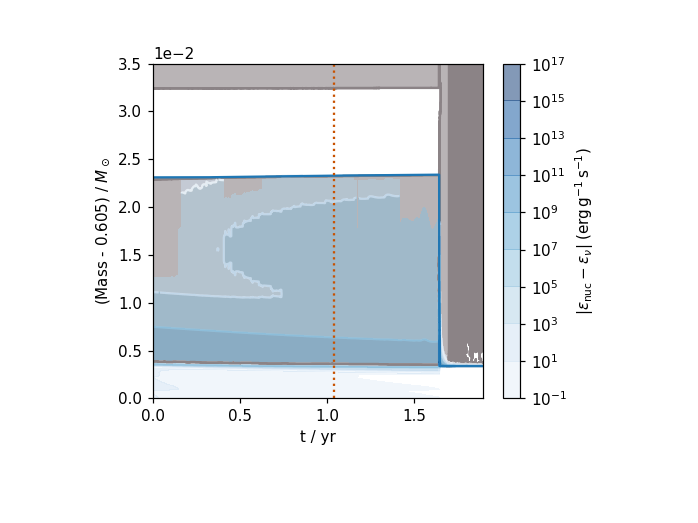

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus age
plotting contours
plotting patches
plotting abund boundaries


In [8]:
import numpy as np

modstart = 15000; modstop = 32000
xres = 2000; yres = 2000
ylims = [0.605, 0.64]
ppm_mod_num = 24150

mod_num = hd.get('model_number')
age = hd.get('star_age')
idx = np.argmin(np.abs(mod_num - ppm_mod_num))
ppm_age = age[idx]

idx0 = np.argmin(np.abs(mod_num - modstart))
age0 = age[idx0]

ifig = 1; pl.close(ifig); fig = pl.figure(ifig)
hd.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop,
            t0_model=modstart, ixaxis='age', xres=xres, yres=yres, ylims=ylims)
pl.gca().ticklabel_format(style='sci', scilimits=(0,0), axis='both')
pl.axvline(ppm_age - age0, ls=':', color=cb(8))
pl.xlabel('t / yr')
fig.tight_layout()

## Fig. 2

<IPython.core.display.Javascript object>


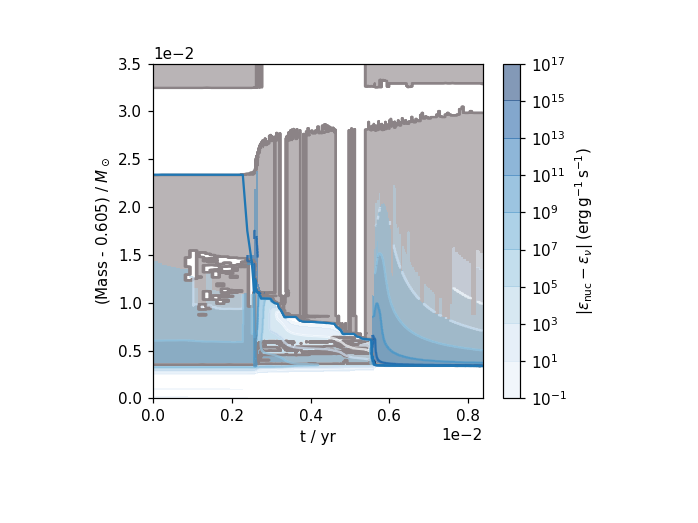

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus age
plotting contours
plotting patches
plotting abund boundaries


In [10]:
modstart = 29400
modstop = 29850
xres = 2000
yres = 2000
ylims = [0.605, 0.64]

ifig = 2; pl.close(ifig); fig = pl.figure(ifig)
hd.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop,
            t0_model=modstart, ixaxis='age', xres=xres, yres=yres, ylims=ylims)
pl.gca().ticklabel_format(style='sci', scilimits=(0,0), axis='both')
pl.xlabel('t / yr')
fig.tight_layout()

## Fig 3

In [3]:

mesa_logs_path = '/data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS/'
mesa_model_num = 24150
mesa_prof = ms.mesa_profile(mesa_logs_path, mesa_model_num)
# convert the mesa variables to cgs units
mesa_r = ast.rsun_cm*mesa_prof.get('radius')
mesa_p = 10**mesa_prof.get('logP')
mesa_rho = 10**mesa_prof.get('logRho')
mesa_mu = mesa_prof.get('mu')
mesa_T = 10**mesa_prof.get('logT')

# get the PPM models in cgs units
F4_prof = yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/')
F4_r = 1e8*F4_prof.get('Y', fname = 0, resolution = 'l')
F4_p = 1e19*F4_prof.get('P', fname = 0, resolution = 'l')
F4_rho = 1e3*F4_prof.get('Rho', fname = 0, resolution = 'l')
F4_FV = F4_prof.get('FV H+He', fname = 0, resolution = 'l')
F4_airmu = 1.39165
F4_cldmu = 0.725
F4_mu = F4_prof.get('mu', fname = 0, resolution = 'l',
                       airmu=F4_airmu, cldmu=F4_cldmu)
F4_T = 1e9*F4_prof.get('T9', fname = 0, resolution = 'l',
                       airmu=F4_airmu, cldmu=F4_cldmu)

# cut out the physical domain
F4_r_bot = 8e8
F4_r_top = 33e8
F4_idx_bot = np.argmin(np.abs(F4_r - F4_r_bot))
F4_idx_top = np.argmin(np.abs(F4_r - F4_r_top))
F4_r = F4_r[F4_idx_top:F4_idx_bot]
F4_p = F4_p[F4_idx_top:F4_idx_bot]
F4_rho = F4_rho[F4_idx_top:F4_idx_bot]
F4_mu = F4_mu[F4_idx_top:F4_idx_bot]
F4_T = F4_T[F4_idx_top:F4_idx_bot]

G2_prof = yprofile('/data/ppm_rpod2/YProfiles/sakurai/G2/')
G2_r = 1e8*G2_prof.get('Y', fname = 0, resolution = 'l')
G2_p = 1e19*G2_prof.get('P', fname = 0, resolution = 'l')
G2_rho = 1e3*G2_prof.get('Rho', fname = 0, resolution = 'l')
G2_FV = G2_prof.get('FV H+He', fname = 0, resolution = 'l')
G2_airmu = 1.53796859981
G2_cldmu = 0.634920634921
G2_mu = G2_prof.get('mu', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)
G2_T = 1e9*G2_prof.get('T9', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)

# cut out the physical domain
G2_r_bot = 7e8
G2_r_top = 22e8
G2_idx_bot = np.argmin(np.abs(G2_r - G2_r_bot))
G2_idx_top = np.argmin(np.abs(G2_r - G2_r_top))
G2_r = G2_r[G2_idx_top:G2_idx_bot]
G2_p = G2_p[G2_idx_top:G2_idx_bot]
G2_rho = G2_rho[G2_idx_top:G2_idx_bot]
G2_mu = G2_mu[G2_idx_top:G2_idx_bot]
G2_T = G2_T[G2_idx_top:G2_idx_bot]

cb = utils.colourblind

983 in profiles.index file ...
Found and load nearest profile for cycle 24150
reading /data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS//log787.data ...
 reading ...100% 



In [4]:
F4_prof = yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/')
F4_prof.vprof_time(fname,comp = 'r',lims=None,save=False,
                   initial_conv_boundaries=True,lw=1., ifig = 12)

In [ ]:
ifig = 1; pl.close(ifig); fig = pl.figure(ifig, figsize=(7., 6.), dpi=120)

xlim = (G2_r_bot/1e8, F4_r_top/1e8)

ax1 = fig.add_subplot(221)
ax1.semilogy(mesa_r/1e8, mesa_p, ls = '-', color = cb(5), label = "MESA")
ax1.semilogy(F4_r/1e8, F4_p, ls = '--', color = cb(1), label = "PPM")
ax1.semilogy(G2_r/1e8, G2_p, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax1.set_xlim(xlim)
ax1.set_ylim((1e15, 1e22))
ax1.set_xlabel('r / Mm')
ax1.set_ylabel('p / Ba')
ax1.legend(loc = 0)

ax2 = fig.add_subplot(222)
ax2.semilogy(mesa_r/1e8, mesa_rho, ls = '-', color = cb(5), label = "MESA")
ax2.semilogy(F4_r/1e8, F4_rho, ls = '--', color = cb(1), label = "PPM")
ax2.semilogy(G2_r/1e8, G2_rho, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax2.set_xlim(xlim)
ax2.set_ylim((1e0, 1e6))
ax2.set_xlabel('r / Mm')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.legend(loc = 0)

ax3 = fig.add_subplot(223)
ax3.semilogy(mesa_r/1e8, mesa_T, ls = '-', color = cb(5), label = "MESA")
ax3.semilogy(F4_r/1e8, F4_T, ls = '--', color = cb(1), label = "PPM")
ax3.semilogy(G2_r/1e8, G2_T, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax3.set_xlim(xlim)
ax3.set_ylim((1e7, 1e9))
ax3.set_xlabel('r / Mm')
ax3.set_ylabel('T / K')
ax3.legend(loc = 0)

ax4 = fig.add_subplot(224)
ax4.plot(mesa_r/1e8, mesa_mu, ls = '-', color = cb(5), label = "MESA")
ax4.plot(F4_r/1e8, F4_mu, ls = '--', color = cb(1), label = "PPM")
ax4.plot(G2_r/1e8, G2_mu, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax4.set_xlim(xlim)
ax4.set_ylim((0.6, 1.8))
ax4.set_xlabel('r / Mm')
ax4.set_ylabel(r'$\mu$')
ax4.legend(loc = 0)

fig.tight_layout()

## Fig 4

In [18]:
spec_dir = '/data/ppm_rpod2/spectra/data/'
dumps = [160, 340, 520, 700, 900]
markers = ['v', '^', '<', '>', 'o', 's']
colours = [9, 3, 5, 8, 1, 6]

<IPython.core.display.Javascript object>


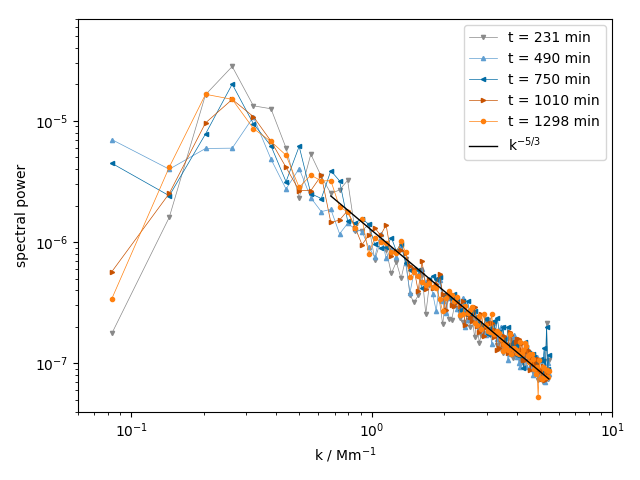

In [20]:
ifig = 1; pl.close(ifig); pl.figure(ifig)
for i in range(len(dumps)):
    t = F4_prof.get('t', fname = dumps[i] - 1, resolution = 'l', silent = False)[-1]
    
    rad = 17.
    fname = spec_dir + 'LZagb-{:04d}-Ur-{:02.0f}.ylmspc'.format(dumps[i], rad)
    data = np.loadtxt(fname)
    
    L = data[:, 0]
    k = np.sqrt(L*(L + 1.))/rad
    power = data[:, 1]
    
    pl.loglog(k, power, '-', lw=0.5, color=cb(colours[i]), marker=markers[i], \
               markevery=1, markersize=3., label='t = {:.0f} min'.format(t/60.))
    
pl.loglog(k[10:], 1.25e-6*k[10:]**(-5./3.), 'k-', lw=1., label=r'k$^{-5/3}$')
    
pl.legend(loc=1, ncol=1)
pl.xlim((6e-2, 1e1))
pl.ylim((4e-8, 7e-5))
pl.xlabel(r'k / Mm$^{-1}$')
pl.ylabel('spectral power')
pl.tight_layout()

# Fig 5 & 6

<IPython.core.display.Javascript object>


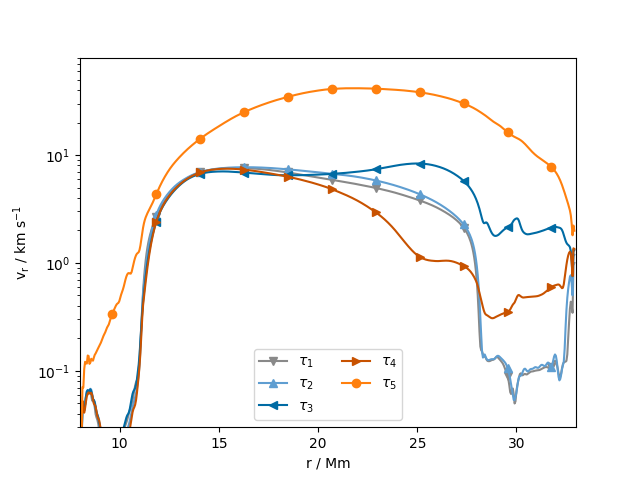

<IPython.core.display.Javascript object>


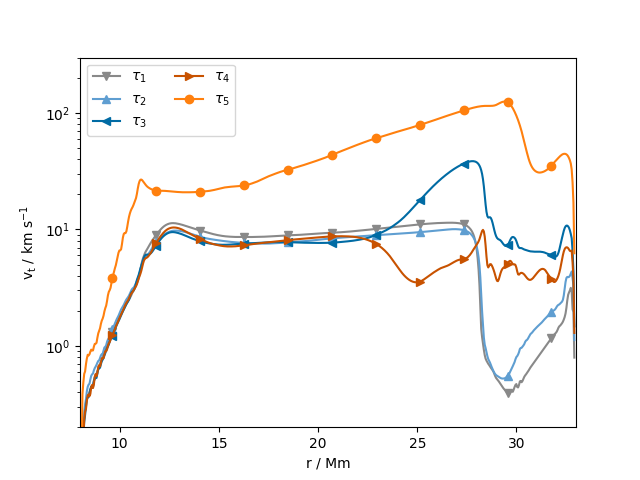

In [3]:
fname = [560, 970, 1469, 1630, 1909]
F4_prof = yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/')
F4_prof.vprof_time(fname,11,comp = 'r',lims=[8., 33.,3e-2, 8e1],save=False,
                   initial_conv_boundaries=False,lw=1., ifig = 5)
F4_prof.vprof_time(fname,11,comp = 't',lims=[8., 33.,2e-1, 3e2],save=False,
                   initial_conv_boundaries=False,lw=1., ifig = 6)

## Fig 7

<IPython.core.display.Javascript object>


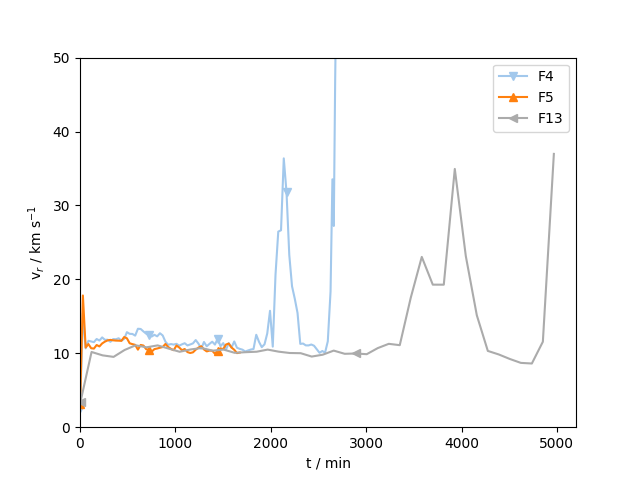

p


In [4]:
set_YProf_path('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/')
v_evolution(['F4','F5','F13'],11.5, 28.5,'tot','max',
            sparse = 20, ifig = 7,last_dump = 2000, lims = [0., 5.2e3,0., 50.])

## Fig 8

<IPython.core.display.Javascript object>


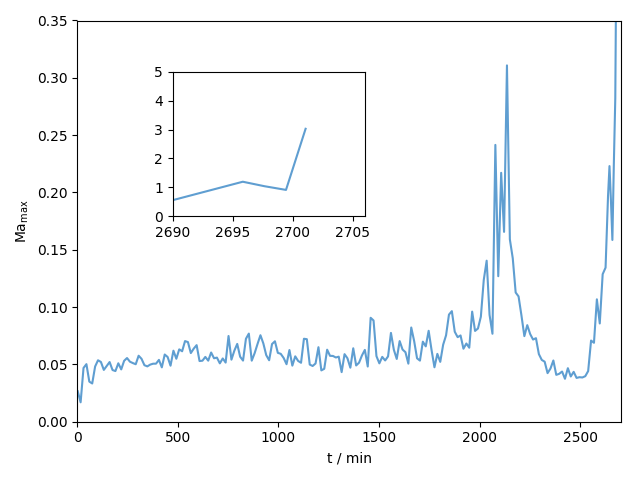

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [4]:
rp_set = rprofile.rprofile_set('/data/ppm_rpod2/RProfiles/AGBTP_M2.0Z1.e-5/F4/')
plot_mach_number(rp_set,F4_prof,range(1,1950,10),insert=True,lims=[0., 2706.,0., 0.35],
                 lims_insert =[2690., 2706.,0., 5. ])
#Plotting every 10th for speed

## Fig 9

<IPython.core.display.Javascript object>


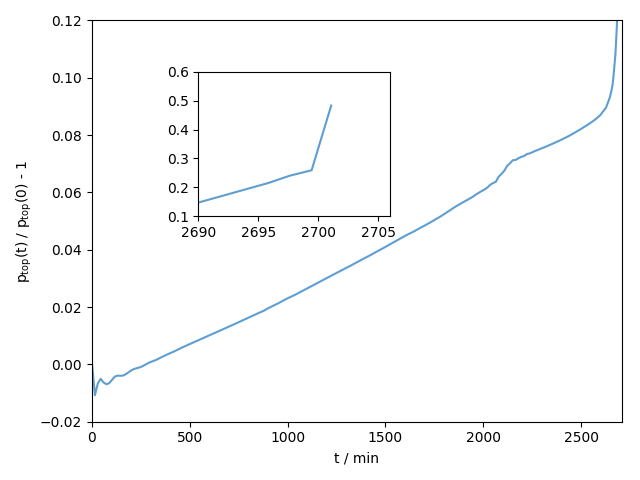

In [4]:
plot_p_top(F4_prof,range(0,1950,10),32.,insert=True,lims=[0., 2706.,-0.02, 0.12],
                 lims_insert =[2690., 2706.,0.1, 0.6 ])
#Plotting every 10th for speed

## Fig 10

Processing F4...
Processing will be done in 27 s.
Processing F5...
Processing will be done in 21 s.
Processing F13...
Processing will be done in 4 s.


<IPython.core.display.Javascript object>


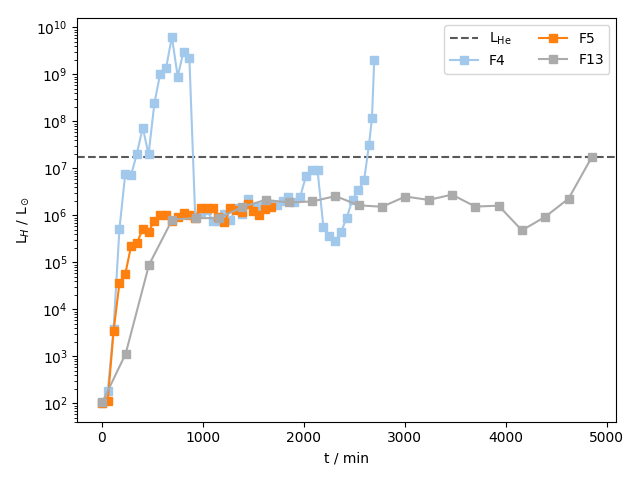

In [3]:
set_YProf_path('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/')
L_H_L_He_comparison(['F4','F5','F13'],sparse = 40)

## Fig 11

<IPython.core.display.Javascript object>


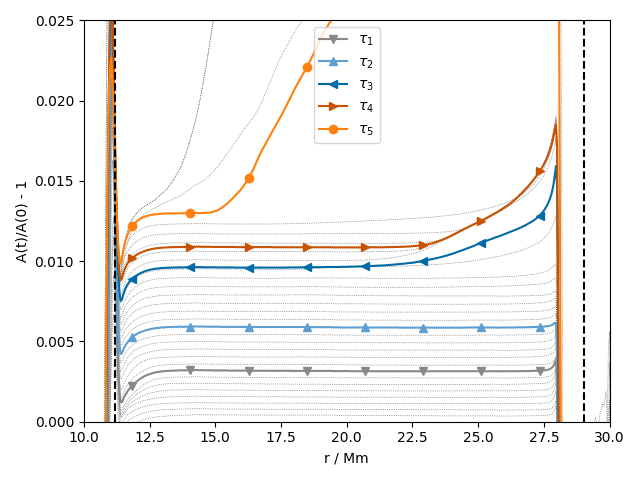

The closest time is at Ndump = 559
The closest time is at Ndump = 970
The closest time is at Ndump = 1469
The closest time is at Ndump = 1630
The closest time is at Ndump = 1908


In [4]:
#F4_prof = yprofile('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4')
F4_prof.Aprof_time(np.array([807., 1399., 2119., 2351., 2695.]),30,lims =[10., 30.,0., 2.5e-2],silent = True)

## Fig 14

<IPython.core.display.Javascript object>


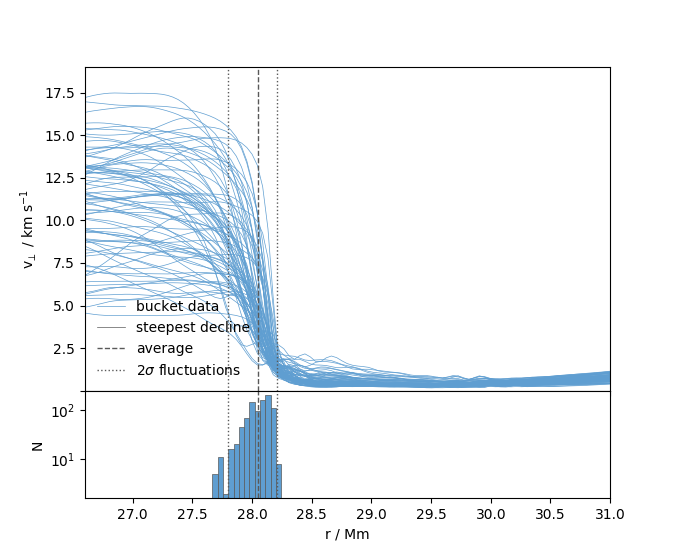

In [3]:
data_path = '/data/ppm_rpod2/RProfiles/AGBTP_M2.0Z1.e-5/F4/'
dump = 560
hist_dmin = dump - 5
hist_dmax = dump + 5
r_lim = (27.0, 30.5)
ut_lim = (1e-3, 19.)
dutdr_lim = (-0.099, 0.02)
upper_bound_ut(data_path,dump, hist_dmin, hist_dmax,r1 = r_lim[0],r2 = 31, derivative = False,
              ylims = [1e-3,19.])

## Fig. 15

<IPython.core.display.Javascript object>


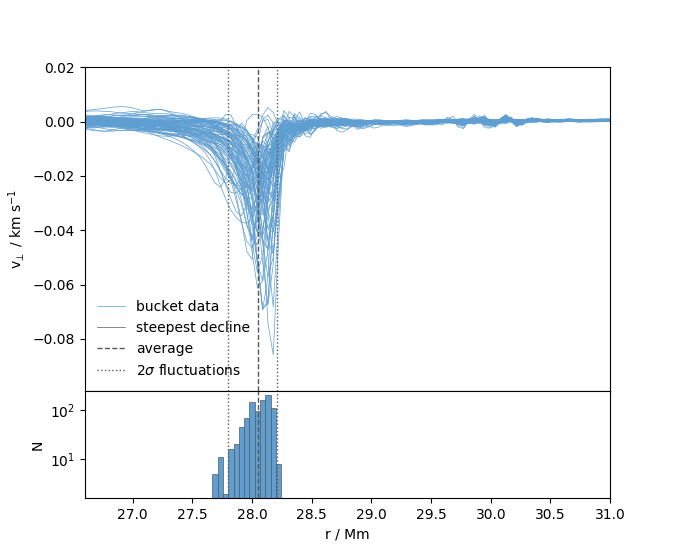

In [5]:
upper_bound_ut(data_path,dump, hist_dmin, hist_dmax,r1 = r_lim[0],r2 = 31, derivative = True,
              ylims = (-0.099, 0.02))

## Fig 16

<IPython.core.display.Javascript object>


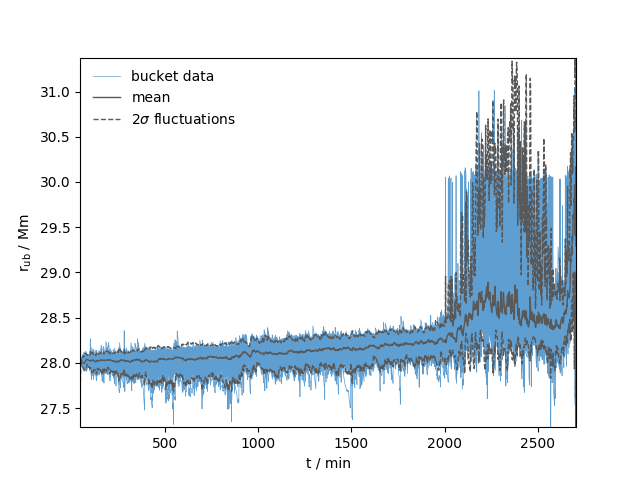

In [6]:
plot_boundary_evolution(data_path, dump, 27., 31., 700)

## Fig 17

In [ ]:
# Might not work needs a dependancy
data_path = "/rpod2/PPM/RProfiles/AGBTP_M2.0Z1.e-5/F4"
rp_set = rprofile.rprofile_set(data_path)
plot_Mollweide(rp_set,dump_min=100,dump_max=209,r1=7.4,r2=8.4)

## Fig 18

<IPython.core.display.Javascript object>


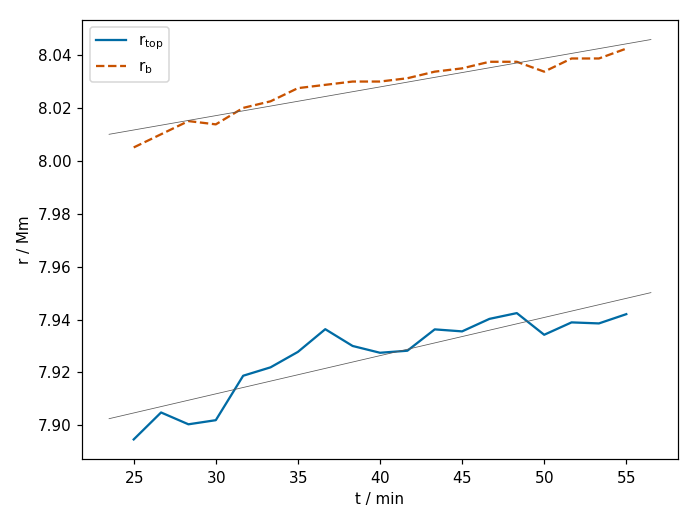

<IPython.core.display.Javascript object>


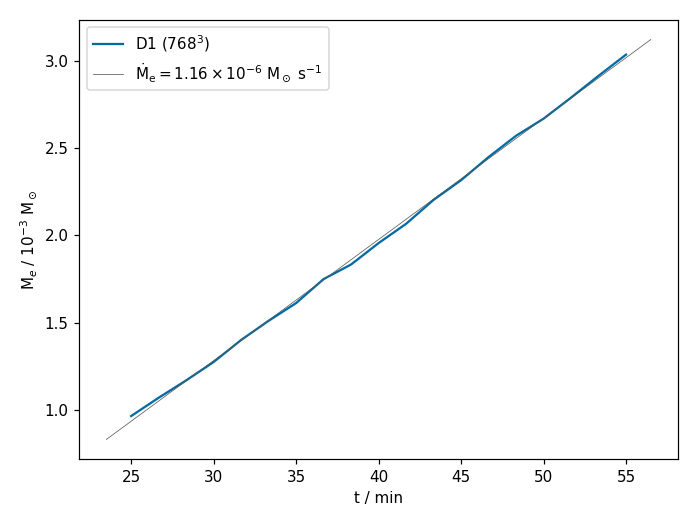

1.1568333893608769e-06

In [3]:
D1 = yprofile('/data/ppm_rpod2/YProfiles/O-shell-M25/D1')
D1.entrainment_rate(range(150, 332, 10), 7.5, 8.5, var = 'vxz',
                     criterion = 'min_grad', offset = -1.,
                     integrate_both_fluids = False, ifig0 = 18,
                     mdot_curve_label = r'D1 $\left( 768^3 \right)$')

## Fig 19

<IPython.core.display.Javascript object>


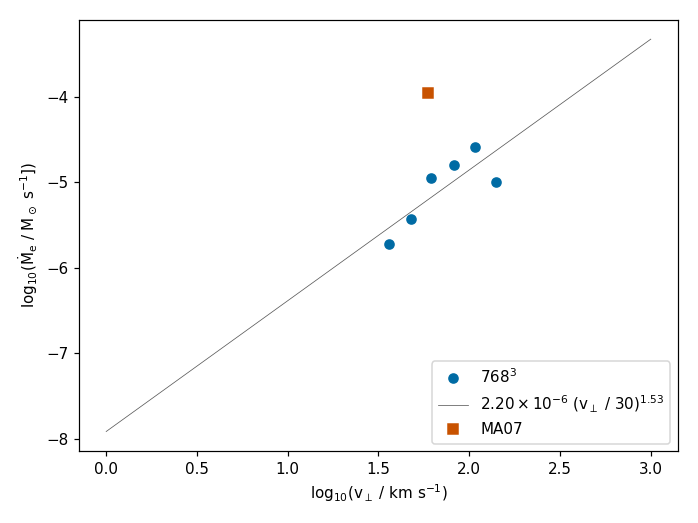

In [2]:
cases = ('D1', 'D8', 'D5', 'D6', 'D9', 'D10')
c0 = (241,154,142,155,123,78)  
plot_entr_v_ut(cases,c0,10,10,7.5,8.5,'tangential','max','$768^3$',ifig0 = 3,
                  integrate_both_fluids = False)

## Fig 20

<IPython.core.display.Javascript object>


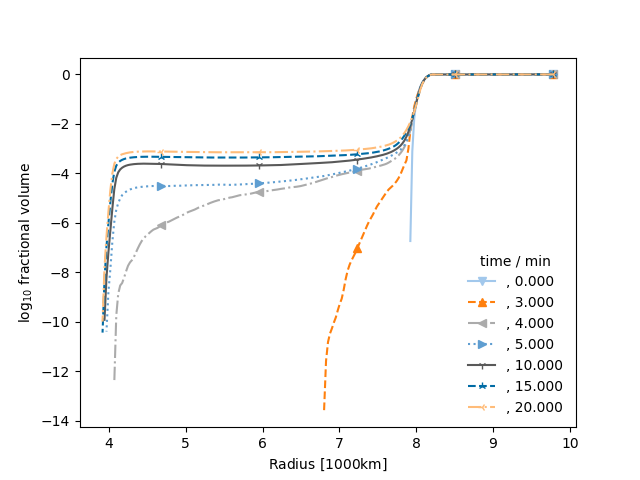

/user/jericho/PyPPM/ppm.py:1626: RuntimeWarning: divide by zero encountered in log10
  pl.plot(Y,np.log10(y),utils.linestyle(i+ls_offset)[0],


In [21]:
D1.prof_time([0,3,4,5,10,15,20],yaxis_thing = 'FV',
             logy=True,num_type='time',markevery = 50)

## Fig 21

/user/jericho/PyPPM/ppm.py:2534: RuntimeWarning: divide by zero encountered in divide
  Hp = - P[1:] * np.diff(r) / np.diff(P)


1386 in profiles.index file ...
Found and load nearest profile for cycle 28900
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02//LOGS/log593.data ...
 reading ...35%

/user/jericho/PyPPM/ppm.py:6837: RuntimeWarning: divide by zero encountered in divide
  Hp = - P[1:] * np.diff(r) * 1.e8 / np.diff(P)
/user/jericho/PyPPM/ppm.py:6839: RuntimeWarning: invalid value encountered in multiply
  Dav = (1./3.) * vav * alpha * Hp


 reading ...100% 



/user/jericho/PyPPM/ppm.py:6852: RuntimeWarning: invalid value encountered in multiply
  Dav2 = (1./3.) * vav * np.minimum(alpha * Hp,rtop*1.e8-r*1.e8)


<IPython.core.display.Javascript object>


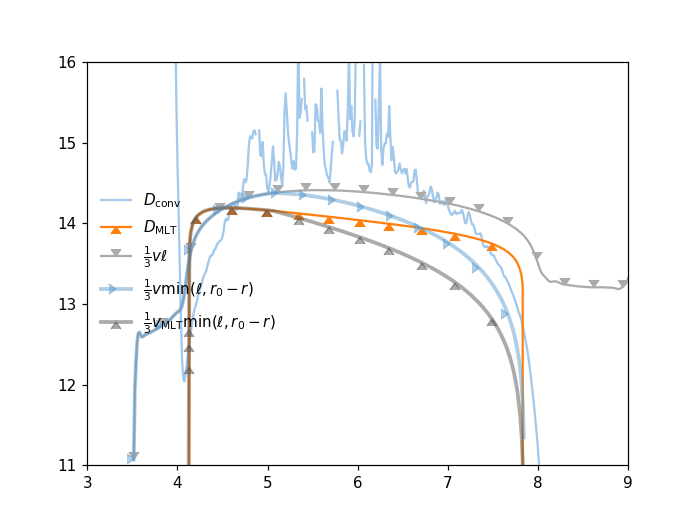

Closing profile tool ...


/user/jericho/PyPPM/ppm.py:6855: RuntimeWarning: divide by zero encountered in log10
  pl.plot(rrc,np.log10(DDc),color = cb(yy),markevery=markevery,\
/user/jericho/PyPPM/ppm.py:6855: RuntimeWarning: invalid value encountered in log10
  pl.plot(rrc,np.log10(DDc),color = cb(yy),markevery=markevery,\
/user/jericho/PyPPM/ppm.py:6862: RuntimeWarning: divide by zero encountered in log10
  pl.plot(r,np.log10(Dav),color = cb(yy),marker = ls(yy)[1], markevery=markevery,\
/user/jericho/PyPPM/ppm.py:6866: RuntimeWarning: divide by zero encountered in log10
  pl.plot(r,np.log10(Dav2),color = cb(yy),marker = ls(yy)[1],markevery=markevery,linewidth=2.5,alpha=0.5,\
/user/jericho/PyPPM/ppm.py:6866: RuntimeWarning: invalid value encountered in log10
  pl.plot(r,np.log10(Dav2),color = cb(yy),marker = ls(yy)[1],markevery=markevery,linewidth=2.5,alpha=0.5,\
/user/jericho/PyPPM/ppm.py:6869: RuntimeWarning: invalid value encountered in log10
  pl.plot(rm,np.log10(Davmes),color = cb(yy),marker = ls(yy)[1],ma

(11, 16)

In [2]:
plot_diffusion_profiles('D2','/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/',28900,
                        7.8489,(1,160),2.*460.,7.8282,10.**12.27,0.21,0.055,1.6)
pl.xlim(3,9)
pl.ylim(11,16)

## Fig 22

<IPython.core.display.Javascript object>


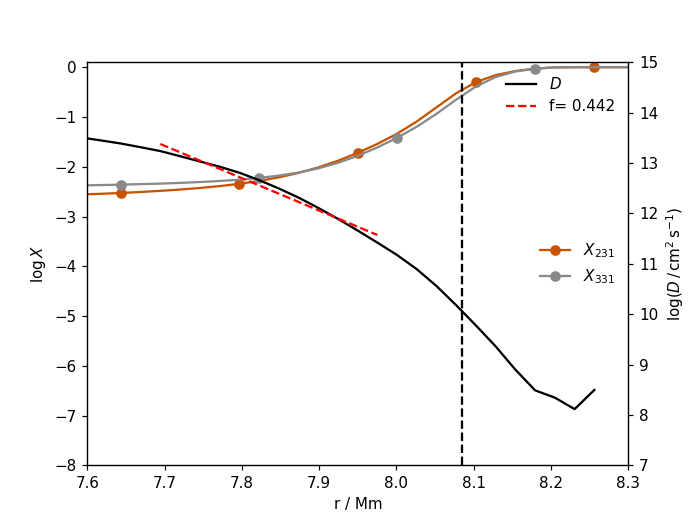

(7, 15)

In [10]:
D1.Dinv(231, 331, plot_Dlt0=False, approx_D = True, linelims = [7.7,8.0],
        r0= 6)
pl.xlim(7.6,8.3)
pl.ylim(7,15)

1.0